In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("Scraped_data.csv")
data1=df1.copy()

In [3]:
df1.describe

<bound method NDFrame.describe of      S.No Parliament Constituency  \
0       1           Anakapalle(5)   
1       2          Rajahmundry(8)   
2       3           Narsapuram(9)   
3       4       Arunachal West(1)   
4       5       Arunachal East(2)   
..    ...                     ...   
538   539        Khadoor Sahib(3)   
539   540             Faridkot(9)   
540   541         Daman & Diu (1)   
541   542            BARAMULLA(1)   
542   543               Ladakh(1)   

                               Winning Candidate Total Votes  Margin Party  
0                                     C.M.RAMESH      762069  296530   BJP  
1                       DAGGUBATI PURANDHESHWARI      726515  239139   BJP  
2    BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA)      707343  276802   BJP  
3                                   KIREN RIJIJU      205417  100738   BJP  
4                                      TAPIR GAO      145581   30421   BJP  
..                                           ...         ..

In [5]:
df1.head()

,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,BJP
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,BJP
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,BJP
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,BJP
4,5,Arunachal East(2),TAPIR GAO,145581,30421,BJP


In [6]:
df1.tail()

,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,Party
538,539,Khadoor Sahib(3),AMRITPAL SINGH,404430,197120,IND
539,540,Faridkot(9),SARABJEET SINGH KHALSA,298062,70053,IND
540,541,Daman & Diu (1),PATEL UMESHBHAI BABUBHAI,42523,6225,IND
541,542,BARAMULLA(1),ABDUL RASHID SHEIKH,472481,204142,IND
542,543,Ladakh(1),MOHMAD HANEEFA,65259,27862,IND


# Data filtering 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.No                     543 non-null    int64 
 1   Parliament Constituency  543 non-null    object
 2   Winning Candidate        543 non-null    object
 3   Total Votes              543 non-null    object
 4   Margin                   543 non-null    object
 5   Party                    543 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.6+ KB


In [9]:
non_num_votes = df1[~df1['Total Votes'].str.isnumeric()]['Total Votes']
non_num_margin = df1[~df1['Margin'].str.isnumeric()]['Margin']
print("Non-numeric Total Votes:", non_num_votes)
print("Non-numeric Margin:", non_num_margin)

Non-numeric Total Votes: 49    -
Name: Total Votes, dtype: object
Non-numeric Margin: 49    -
Name: Margin, dtype: object


In [10]:
df1['Total Votes'] = pd.to_numeric(df1['Total Votes'], errors='coerce')
df1['Margin'] = pd.to_numeric(df1['Margin'], errors='coerce')

In [11]:
df1['Total Votes'] = df1['Total Votes'].fillna(0)  # Replace NaN with 0
df1['Margin'] = df1['Margin'].fillna(0)  # Replace NaN with 0

In [13]:
df1['Total Votes'] = df1['Total Votes'].astype(int)
df1['Margin'] = df1['Margin'].astype(int)

In [14]:
df1.max()

S.No                                 543
Parliament Constituency     Zahirabad(5)
Winning Candidate          ZIA UR REHMAN
Total Votes                      1471885
Margin                           1175092
Party                                ZPM
dtype: object

In [15]:
df1.min()

S.No                                                    1
Parliament Constituency                        AJMER (13)
Winning Candidate          AASHTIKAR PATIL NAGESH BAPURAO
Total Votes                                             0
Margin                                                  0
Party                                                AAAP
dtype: object

In [16]:
df1.describe()

,S.No,Total Votes,Margin
count,543.000000,5.430000e+02,5.430000e+02
mean,272.000000,6.011045e+05,1.620511e+05
std,156.894869,1.684989e+05,1.472917e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,136.500000,4.990795e+05,5.860700e+04
50%,272.000000,5.860440e+05,1.214940e+05
75%,407.500000,7.156405e+05,2.227650e+05
max,543.000000,1.471885e+06,1.175092e+06


In [19]:
#droped serial num
df1=df1.drop('S.No',axis=1)

In [20]:
df1.describe()

,Total Votes,Margin
count,5.430000e+02,5.430000e+02
mean,6.011045e+05,1.620511e+05
std,1.684989e+05,1.472917e+05
min,0.000000e+00,0.000000e+00
25%,4.990795e+05,5.860700e+04
50%,5.860440e+05,1.214940e+05
75%,7.156405e+05,2.227650e+05
max,1.471885e+06,1.175092e+06


In [21]:
df1['Party'].value_counts()

BJP           240
INC            99
SP             37
AITC           29
DMK            22
TDP            16
JD(U)          12
SHSUBT          9
NCPSP           8
IND             7
SHS             7
LJPRV           5
RJD             4
CPI(M)          4
YSRCP           4
IUML            3
AAAP            3
JMM             3
JKN             2
RLD             2
CPI             2
VCK             2
CPI(ML)(L)      2
JNP             2
JD(S)           2
RLTP            1
AIMIM           1
AJSUP           1
ADAL            1
ASPKR           1
MDMK            1
SKM             1
BHRTADVSIP      1
ZPM             1
SAD             1
VOTPP           1
NCP             1
RSP             1
KEC             1
AGP             1
UPPL            1
HAMS            1
Name: Party, dtype: int64

In [22]:
#finding null values
df1.isnull().sum()

Parliament Constituency    0
Winning Candidate          0
Total Votes                0
Margin                     0
Party                      0
dtype: int64

In [23]:
#finding notnull values 
df1.notnull().sum()

Parliament Constituency    543
Winning Candidate          543
Total Votes                543
Margin                     543
Party                      543
dtype: int64

In [24]:
non_num_votes = data1[~data1['Total Votes'].apply(lambda x: str(x).isdigit())]
print("Rows with non-numeric values in 'Total Votes':")
print(non_num_votes['Winning Candidate'])

Rows with non-numeric values in 'Total Votes':
49    MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested)
Name: Winning Candidate, dtype: object


# Aggregations

In [27]:
#consider only number data
data2=df1.copy()
n_data=data2.drop(columns={"Party","Parliament Constituency"})
n_data.head()

,Winning Candidate,Total Votes,Margin
0,C.M.RAMESH,762069,296530
1,DAGGUBATI PURANDHESHWARI,726515,239139
2,BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802
3,KIREN RIJIJU,205417,100738
4,TAPIR GAO,145581,30421


In [28]:
n_data["Total Votes"].mean()

601104.526703499

In [29]:
n_data["Total Votes"].mode()

0    692832
dtype: int32

In [30]:
n_data["Total Votes"].median()

586044.0

In [32]:
n_data.sort_values("Total Votes").head()

,Winning Candidate,Total Votes,Margin
49,MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested),0,0
337,MUHAMMED HAMDULLAH SAYEED,25726,2647
540,PATEL UMESHBHAI BABUBHAI,42523,6225
542,MOHMAD HANEEFA,65259,27862
229,BISHNU PADA RAY,102436,24396


In [33]:
n_data.sort_values("Margin").head()

,Winning Candidate,Total Votes,Margin
49,MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested),0,0
476,RAVINDRA DATTARAM WAIKAR,452644,48
274,ADV ADOOR PRAKASH,328051,684
124,RABINDRA NARAYAN BEHERA,534239,1587
138,RAO RAJENDRA SINGH,617877,1615


# Virtualization

<AxesSubplot:xlabel='Margin', ylabel='Density'>

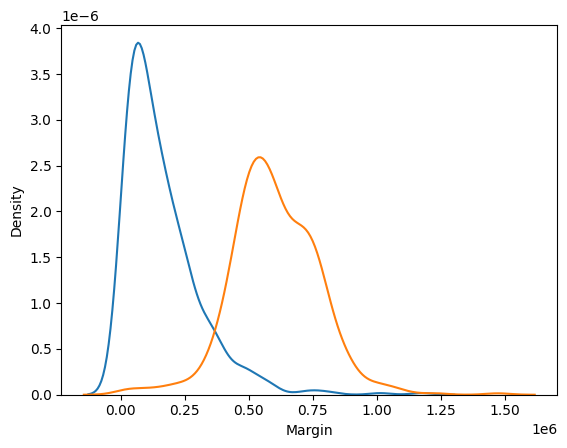

In [34]:
sns.kdeplot(n_data["Margin"])
sns.kdeplot(n_data["Total Votes"])

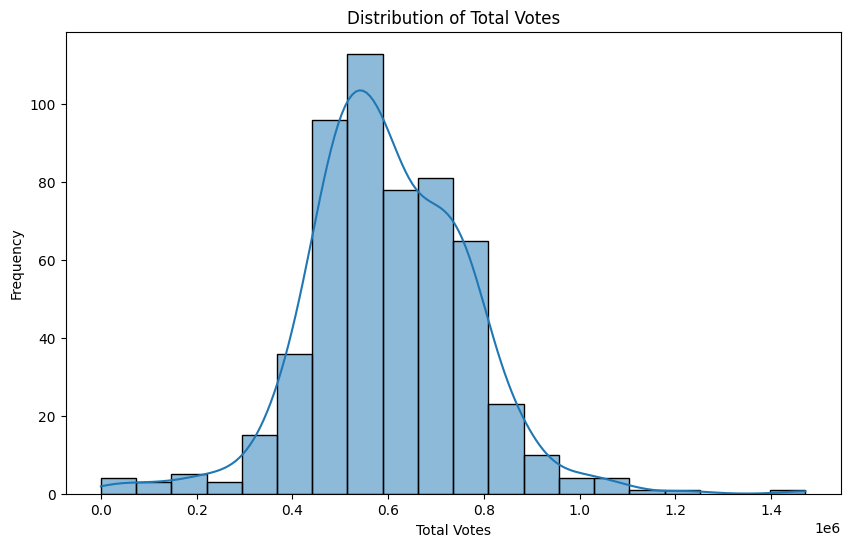

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Total Votes'], bins=20, kde=True)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

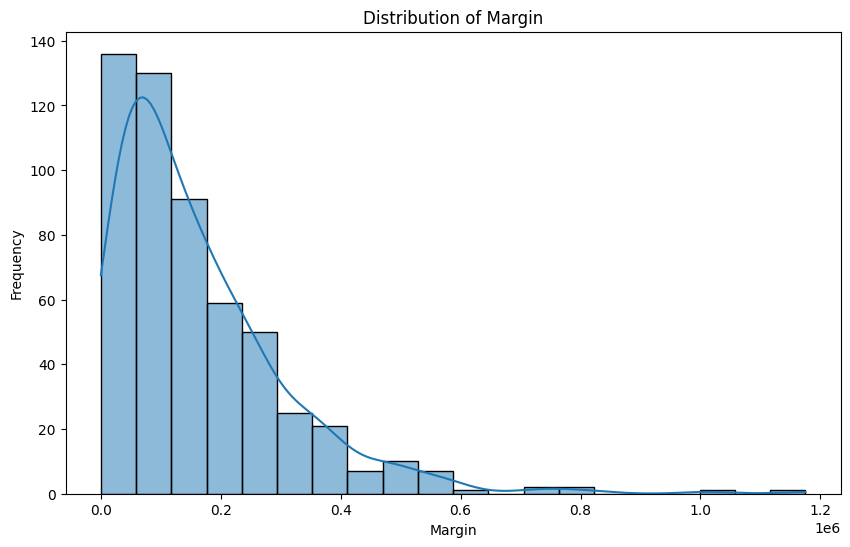

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Margin'], bins=20, kde=True)
plt.title('Distribution of Margin')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

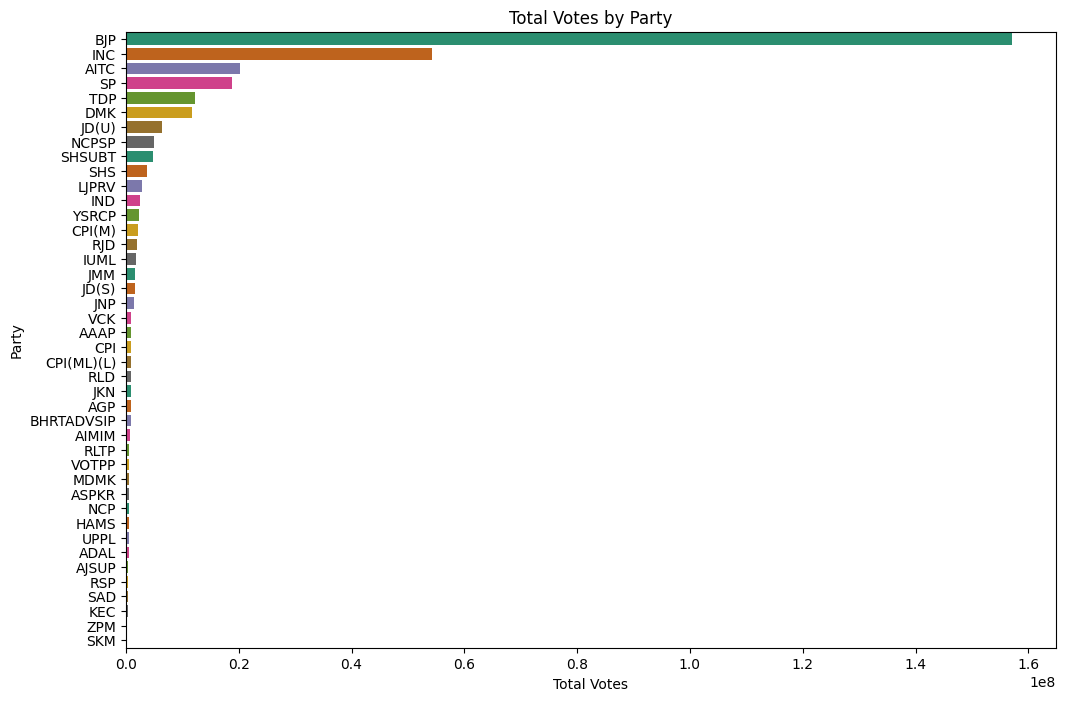

In [37]:
df1['Total Votes'] = pd.to_numeric(df1['Total Votes'], errors='coerce')
df1['Total Votes'] = df1['Total Votes'].fillna(0)
party_votes = df1.groupby('Party')['Total Votes'].sum().reset_index()
party_votes = party_votes.sort_values(by='Total Votes', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Votes', y='Party', data=party_votes, palette='Dark2')
plt.title('Total Votes by Party')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.show()

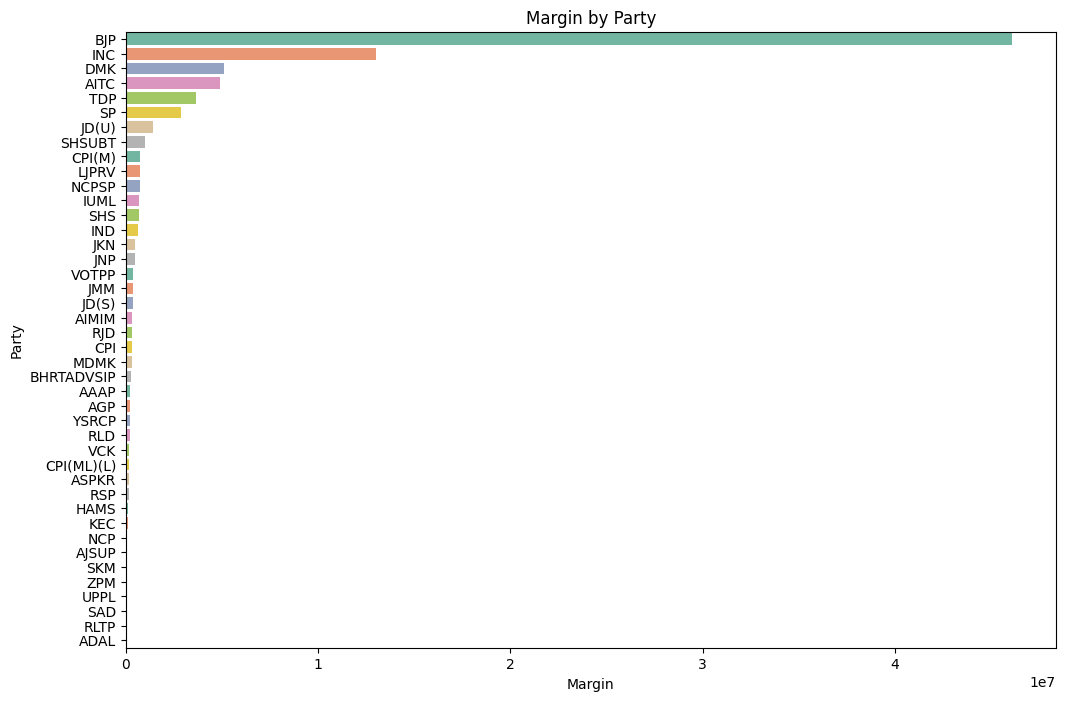

In [44]:
df1['Margin'] = pd.to_numeric(df1['Margin'], errors='coerce')
df1['Margin'] = df1['Margin'].fillna(0)
party_margin = df1.groupby('Party')['Margin'].sum().reset_index()
party_margin = party_margin.sort_values(by='Margin', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Margin', y='Party', data=party_margin, palette='Set2')
plt.title('Margin by Party')
plt.xlabel('Margin')
plt.ylabel('Party')
plt.show()

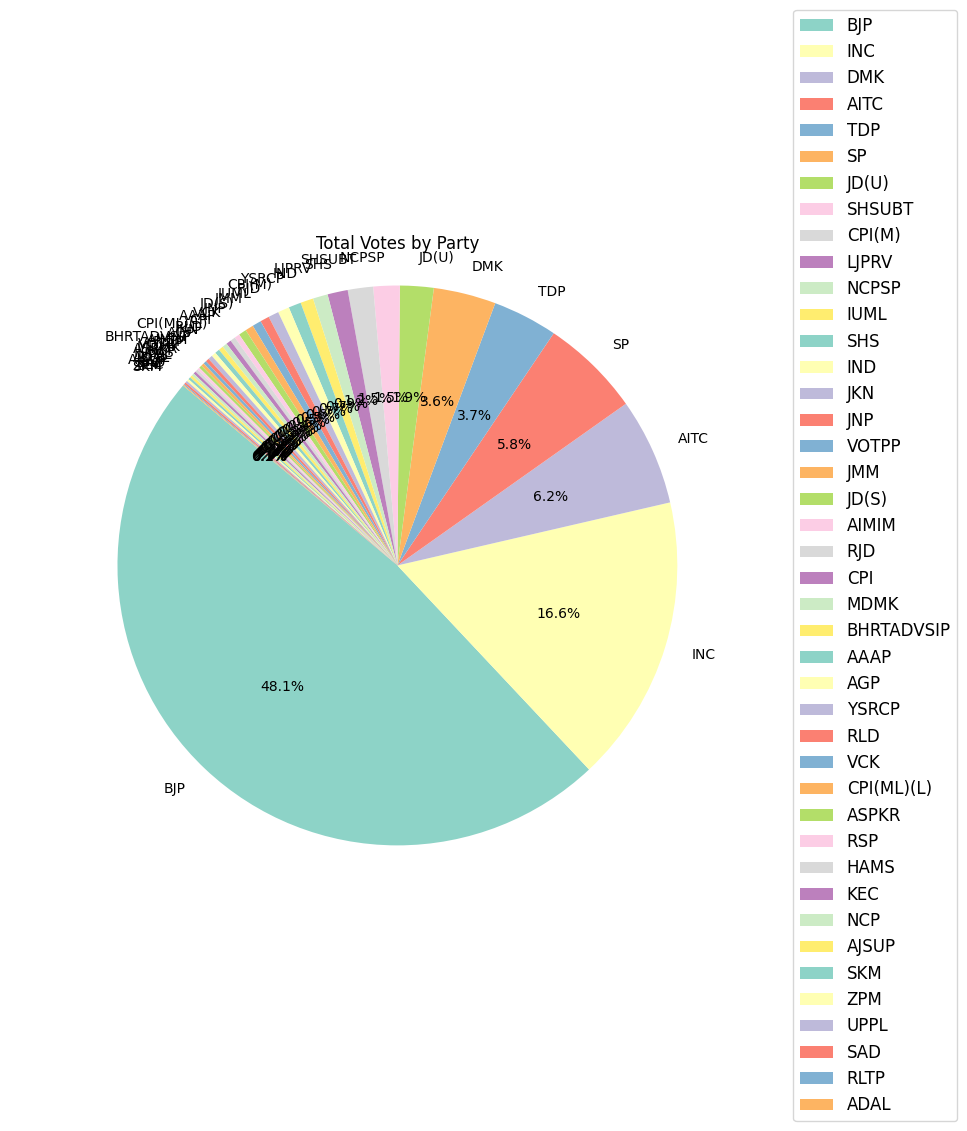

In [45]:
plt.figure(figsize=(10, 8))
plt.pie(party_votes['Total Votes'], labels=party_votes['Party'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Total Votes by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(party_margin['Party'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

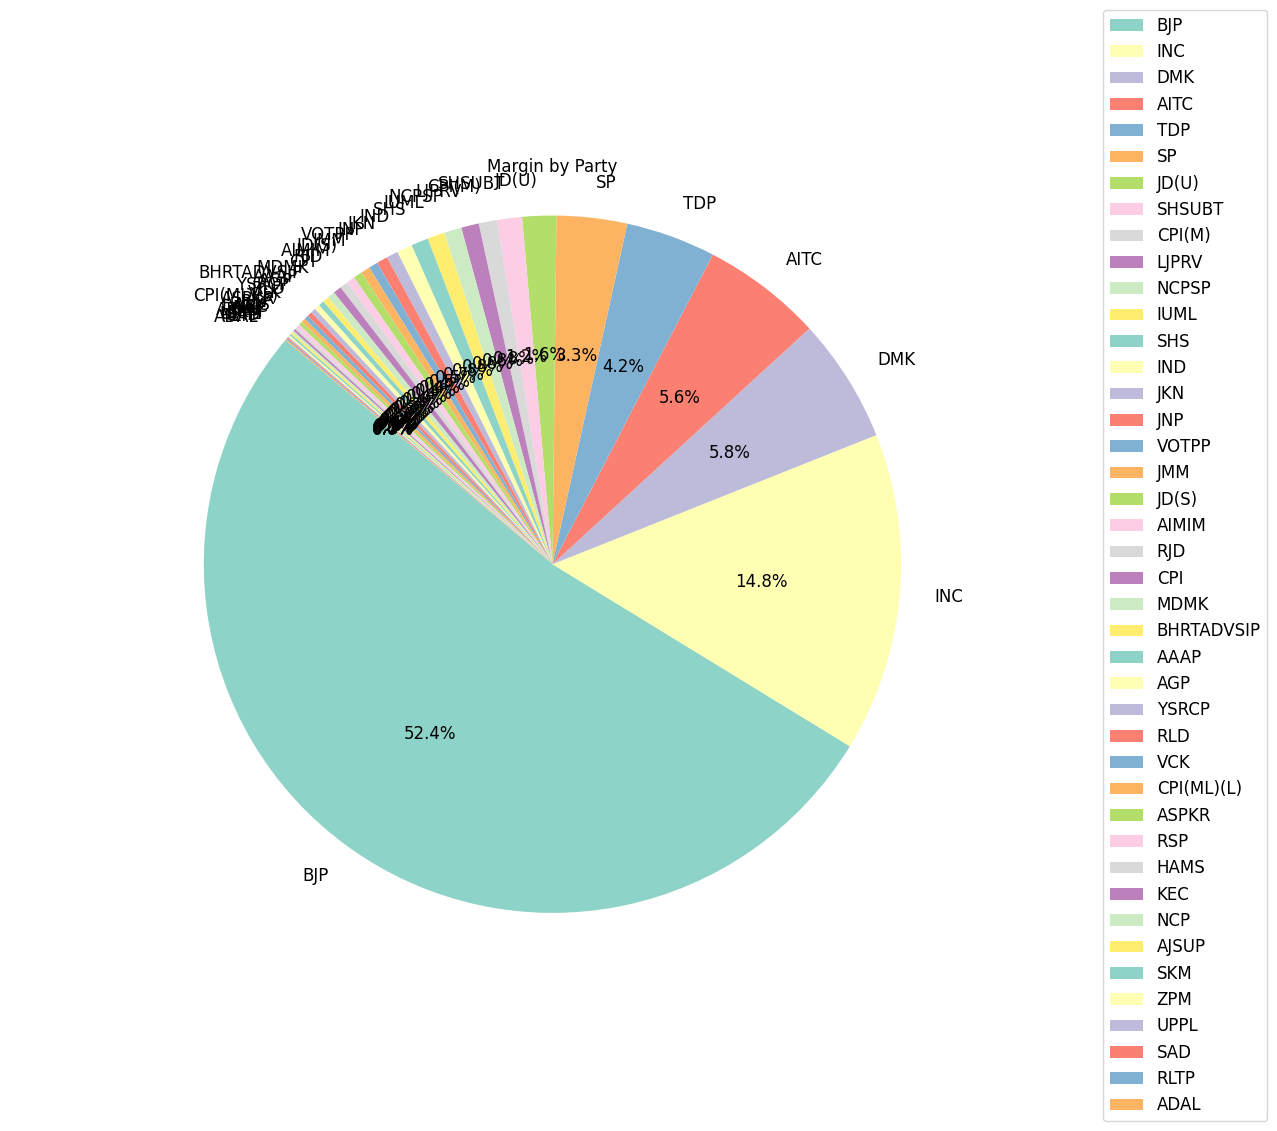

In [47]:
plt.figure(figsize=(14, 10))
plt.pie(party_margin['Margin'], labels=party_margin['Party'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors, textprops={'fontsize': 12})
plt.title('Margin by Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend outside the pie chart
plt.legend(party_margin['Party'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

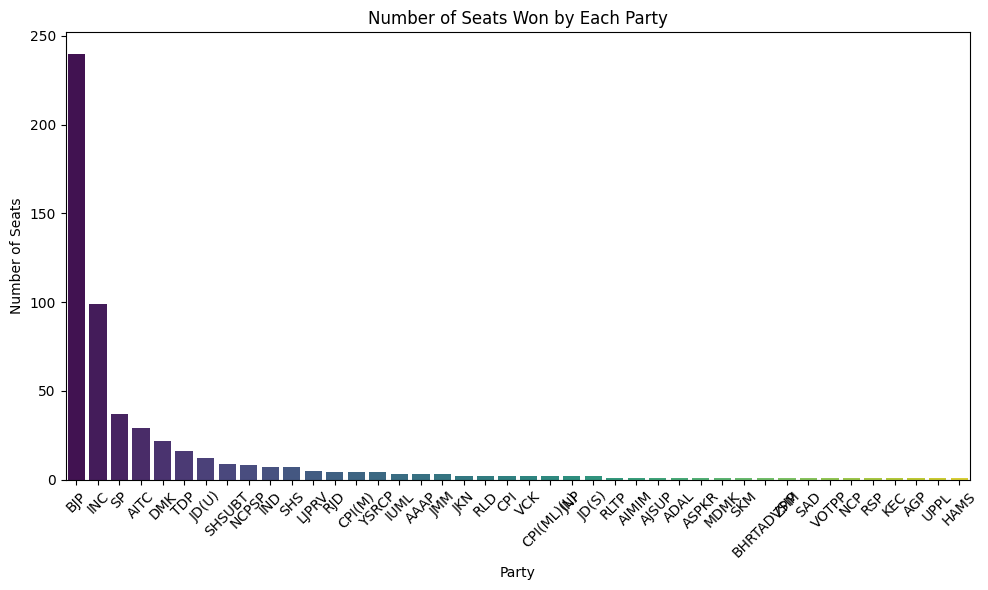

In [48]:
party_counts = df1['Party'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=party_counts.index, y=party_counts.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

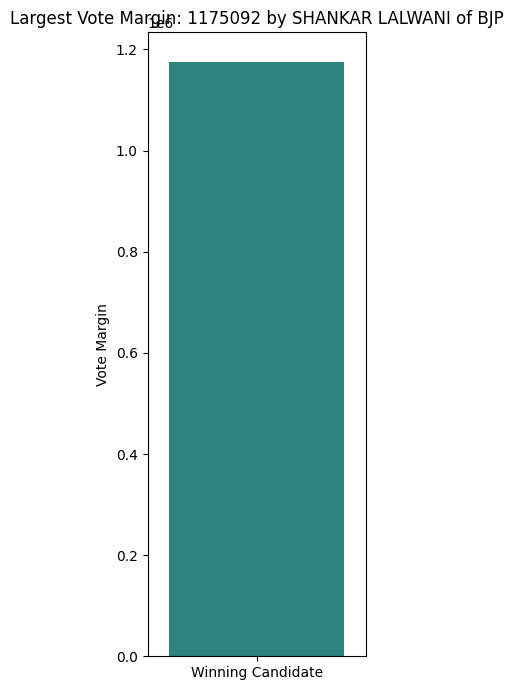

In [52]:
largest_margin = df1.loc[df1['Margin'].idxmax()]
plt.figure(figsize=(3, 7))
sns.barplot(x=['Winning Candidate'], y=[largest_margin['Margin']], palette='viridis')
plt.title(f'Largest Vote Margin: {largest_margin["Margin"]} by {largest_margin["Winning Candidate"]} of {largest_margin["Party"]}')
plt.ylabel('Vote Margin')
plt.tight_layout()

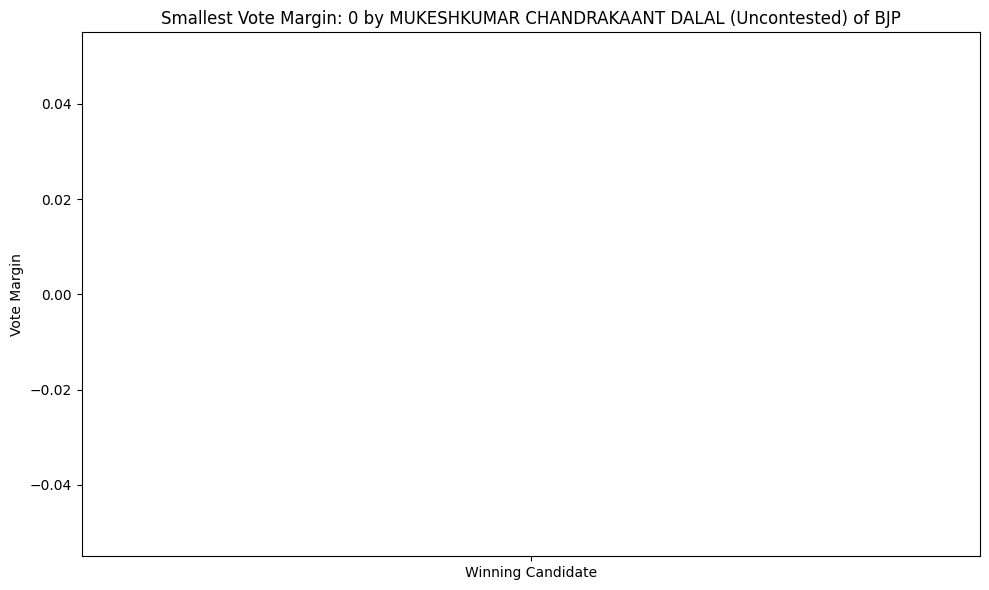

In [54]:
smallest_margin = df1.loc[df1['Margin'].idxmin()]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Winning Candidate'], y=[smallest_margin['Margin']], palette='viridis')
plt.title(f'Smallest Vote Margin: {smallest_margin["Margin"]} by {smallest_margin["Winning Candidate"]} of {smallest_margin["Party"]}')
plt.ylabel('Vote Margin')
plt.tight_layout()
plt.show()

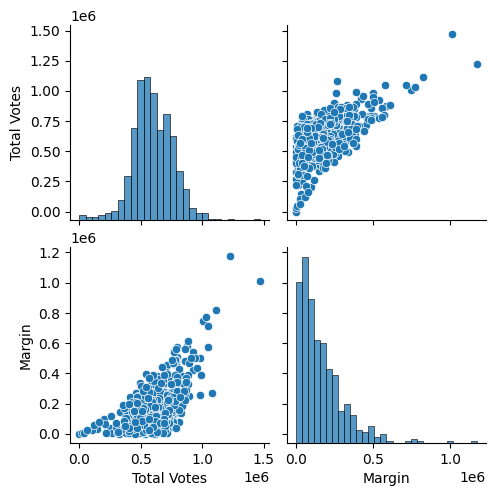

In [55]:
sns.pairplot(n_data)

<AxesSubplot:>

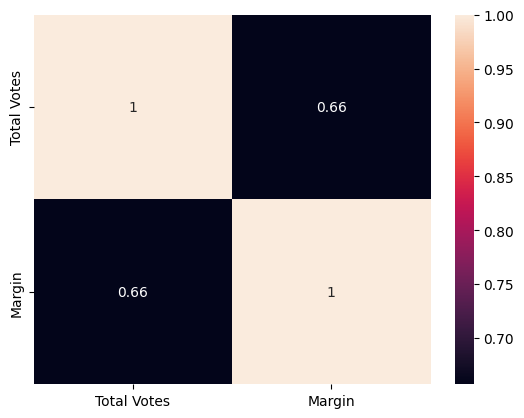

In [57]:
sns.heatmap(n_data.corr(),annot=True)